In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
def dist(x,y):

    d = np.zeros([x.shape[0], y.shape[0]])
    for i in range(x.shape[0]):
        for j in range(y.shape[0]):

            d[i][j] = np.abs(x[i] - y[j])

    return d

(array([ 1.,  4.,  5.,  6.,  7., 22., 17., 20., 10.,  3.,  2.,  3.]),
 array([ 8.78258112,  8.9893796 ,  9.19617807,  9.40297655,  9.60977503,
         9.81657351, 10.02337199, 10.23017046, 10.43696894, 10.64376742,
        10.8505659 , 11.05736438, 11.26416285]),
 <BarContainer object of 12 artists>)

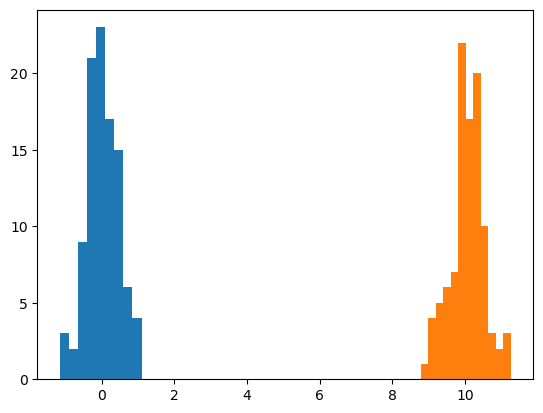

In [30]:
n = 100
m = 100

mu, sigma = 0, 0.5

#distributions
seed = np.random.seed(seed = 1)

X = np.random.normal(mu, sigma, n)
Y = np.random.normal(mu + 10, sigma, m)

#weights
a = np.ones([n])
b = np.ones([m])

a_n = a/np.sum(a)
b_n = b/np.sum(b)

plt.hist(X, bins = 'auto')
plt.hist(Y, bins = 'auto')

10.0461059627618
[[0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]
 [0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]
 [0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]
 ...
 [0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]
 [0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]
 [0.00010002 0.00010002 0.00010002 ... 0.00010002 0.00010002 0.00010002]]


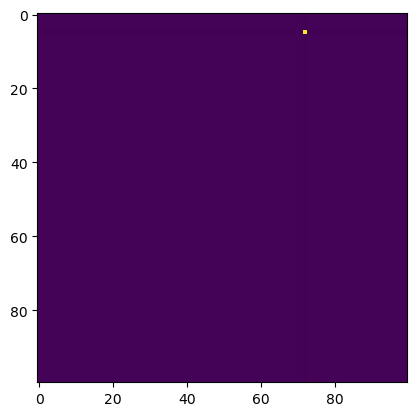

In [31]:
M = dist(X,Y)

P = cp.Variable((n,m))

U = [0 <= P, cp.sum(P, axis = 1) <= a_n, cp.sum(P, axis = 0) <= b_n, cp.sum(cp.sum(P, axis = 1), axis = 0) == cp.minimum(cp.sum(a_n), cp.sum(b_n))]

objective = cp.Minimize(cp.sum(cp.sum(cp.multiply(P, M))) + cp.abs(cp.sum(a_n, axis = 0) - cp.sum(b_n, axis = 0)))

prob = cp.Problem(objective, U)
result = prob.solve(solver = cp.ECOS)

plt.imshow(P.value)

W = cp.sum(cp.multiply(P, M)).value

print(W)
print(P.value)

1004.6105962767498
[[0.01000003 0.00999999 0.01000005 ... 0.01000005 0.01000004 0.01000002]
 [0.00999999 0.00999999 0.00999997 ... 0.00999997 0.00999997 0.00999998]
 [0.01       0.00999998 0.00999997 ... 0.00999997 0.00999997 0.00999997]
 ...
 [0.01000002 0.00999996 0.00999999 ... 0.00999999 0.00999998 0.00999997]
 [0.00999999 0.00999999 0.00999997 ... 0.00999997 0.00999997 0.00999998]
 [0.01000003 0.00999997 0.01000002 ... 0.01000002 0.01       0.00999998]]
100.00000000005672


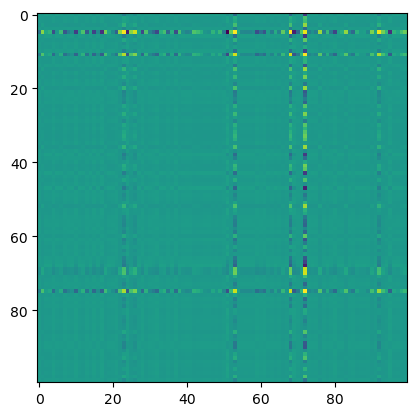

In [35]:
M = dist(X,Y)

P2 = cp.Variable((n,m))

U2 = [0 <= P2, cp.sum(P2, axis = 1) <= a, cp.sum(P2, axis = 0) <= b, cp.sum(cp.sum(P2, axis = 1), axis = 0) == cp.minimum(cp.sum(a), cp.sum(b))]

objective2 = cp.Minimize(cp.sum(cp.sum(cp.multiply(P2, M))) + cp.abs(cp.sum(a) - cp.sum(b)))

prob = cp.Problem(objective2, U2)
result2 = prob.solve(solver = cp.ECOS)

plt.imshow(P2.value)

W2 = cp.sum(cp.multiply(P2, M)).value

print(W2)
print(P2.value)

print(W2/W)

In [13]:
print(cp.minimum(cp.sum(a), cp.sum(b)).value)

100.0
